## Introductions

In this project we are going to use Logestic Regression and try to classify the presence of heart disease in an individual.This a prime example of how machine learning can help solve problems that have a real impact on people's lives.

The dataset comes from the famous Cleveland Clinic Foundation, which recorded information on various patient characteristics, including age and chest pain.

Link: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [31]:
#imports
import seaborn as sns
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('heart_disease.csv')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## Exploring the Dataset

Before we build any model, we should explore the dataset and perform any adjustments we might need before actually fitting the model. This may include converting categorical variables into dummy variables or centering and scaling variables. We'll also want to check for predictors that are distributed differently based on the outcome, since they could be informative for classification.

In [2]:
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype='object')

The present column is our binary outcome of interest. 0 encodes the absence of any heart disease, while 1 encodes the presence.

Note: the original dataset actually has a multiclass version of the problem, based on heart disease severity. We've reduced it to a binary case for simplicity.

Here is what we know based on the offical page of what each column represents:

1. #3 (age) - age in years
2. #4 (sex) - sex (1 = male; 0 = female)
3. #9 (cp)- chest pain type
           -- Value 1: typical angina
            -- Value 2: atypical angina
            -- Value 3: non-anginal pain
            -- Value 4: asymptomatic
4. #10 (trestbps) -resting blood pressure (in mm Hg on admission to the hospital)
5. #12 (chol) - serum cholestoral in mg/dl
6. #16 (fbs) -(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. #19 (restecg) - resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. #32 (thalach)-maximum heart rate achieved
9. #38 (exang)-exercise induced angina (1 = yes; 0 = no)
10. #40 (oldpeak)-ST depression induced by exercise relative to rest
11. #41 (slope)- the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
12. #44 (ca) -number of major vessels (0-3) colored by flourosopy
13. #51 (thal)- 3 = normal; 6 = fixed defect; 7 = reversable defect
14. #58 (num) (the predicted attribute) - diagnosis of heart disease (angiographic disease status)
    -- Value 0: < 50% diameter narrowing
    -- Value 1: > 50% diameter narrowing
    (in any major vessel: attributes 59 through 68 are vessels)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [4]:
for i in df.columns:
    print(df[i].value_counts())

1      1
209    1
207    1
206    1
205    1
      ..
101    1
100    1
99     1
98     1
303    1
Name: Unnamed: 0, Length: 303, dtype: int64
58    19
57    17
54    16
59    14
52    13
60    12
51    12
56    11
62    11
44    11
64    10
41    10
67     9
63     9
42     8
43     8
45     8
53     8
55     8
61     8
65     8
50     7
66     7
48     7
46     7
47     5
49     5
70     4
68     4
35     4
39     4
69     3
71     3
40     3
34     2
37     2
38     2
29     1
77     1
74     1
76     1
Name: age, dtype: int64
1    206
0     97
Name: sex, dtype: int64
4    144
3     86
2     50
1     23
Name: cp, dtype: int64
120    37
130    36
140    32
110    19
150    17
138    12
128    12
160    11
125    11
112     9
132     8
118     7
124     6
108     6
135     6
152     5
134     5
145     5
100     4
170     4
122     4
126     3
136     3
115     3
180     3
142     3
105     3
102     2
146     2
144     2
148     2
178     2
94      2
165     1
123     1
114     1
154

Based on the cell above we can see that they are 4 instance in ca column and 2 instance in the thal column where there is missing information which is denoted by "?". We will remove those rows as they will not greatly affect te overall data. It will only remove one percent of the actual data which is not alot of it.

In [5]:
df=df[df['ca']!="?"]
df=df[df['thal']!="?"]

In [6]:
df['ca'].value_counts()

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [7]:
df['thal'].value_counts()

3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64

Now that we removed those values we can now convert the remaining twoo values into numerica values


In [8]:
df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])


In [9]:
df.dtypes

Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca            float64
thal          float64
present         int64
dtype: object

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,297.0,150.673401,87.323283,1.0,75.0,150.0,226.0,302.0
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,3.158249,0.964859,1.0,3.0,3.0,4.0,4.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0


array([[<AxesSubplot:title={'center':'present'}>]], dtype=object)

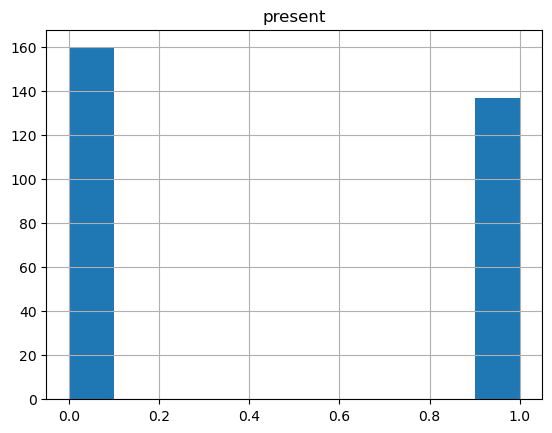

In [12]:
df.hist('present')

Based on this we can see that there is an alomost equal number of cases and npn cases in the present column.

In the next cell we are going to group all the columns by the our target variable (which in this case is present) and then aggregate the columns based on the mean of them. Based on which of the columns have the highest mean we can can then pick our predictors.

In [13]:
# Checking potential predictors
df.groupby("present").agg({'age': 'mean', 'cp': 'mean',
                           'trestbps': 'mean', 'chol': 'mean',
                           'fbs': 'mean', 'restecg': 'mean',
                           'thalach': 'mean', 'exang': 'mean',
                           'oldpeak': 'mean', 'slope': 'mean',
                           'ca': 'mean', 'thal': 'mean'})

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
present,,,,,,,,,,,,
0,52.643750,2.793750,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,1.412500,0.275000,3.787500
1,56.759124,3.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,1.824818,1.145985,5.832117


Some columns have a small, but noticeable difference when stratified by predictors. Based on the differences and some knowledge about heart disease, these seem like good candidates for predictors using an aggreagation:

- age 
- thalach (maximum heart rate achieved)
- restecg (resting ECG)
- ca (number of vessels colored by fluoroscopy)

<AxesSubplot:>

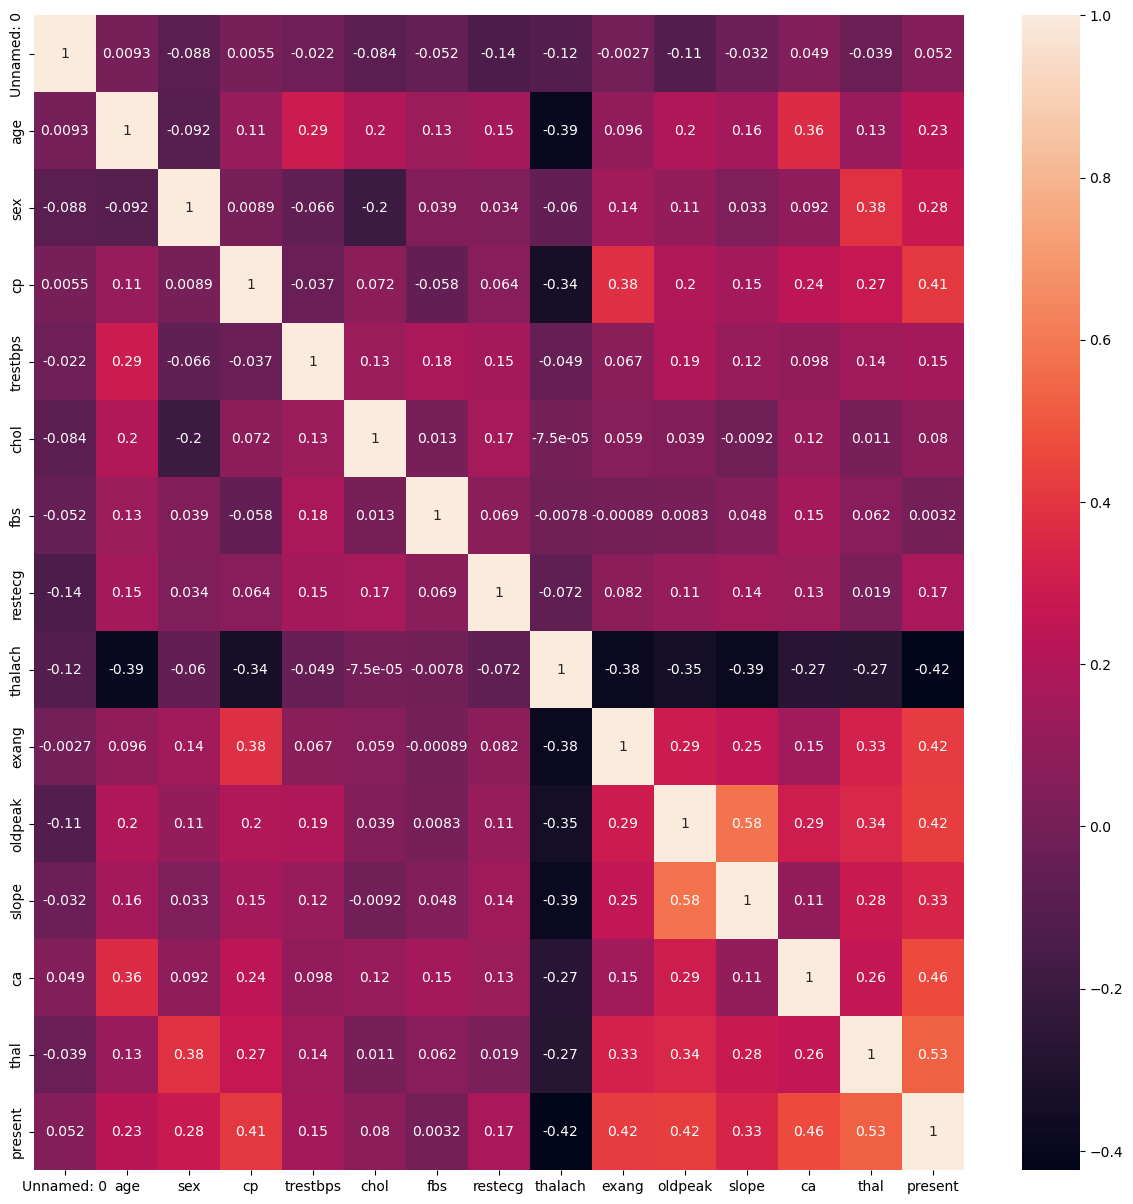

In [15]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [17]:
df.corr()['present'].sort_values(ascending=False)

present       1.000000
thal          0.526640
ca            0.463189
oldpeak       0.424052
exang         0.421355
cp            0.408945
slope         0.333049
sex           0.278467
age           0.227075
restecg       0.166343
trestbps      0.153490
chol          0.080285
Unnamed: 0    0.051891
fbs           0.003167
thalach      -0.423817
Name: present, dtype: float64

Based on our heatmap we know that present is correalted  to thal, ca,oldpeak,exang,cp and slope.  The reason why we are looking at specfically these values is that the correaltion is greater than 0.3 and that is what we are going to look at. Surprisingly chloestrol was not hight correalted.       

Now based on the heatmap and the aggreagtion we had used we can now decide which columns are going to be our predictors:

1. age: age alwasy plays a factor for heart disease, older you are greater chance of the person getting heart disease
2. thalach (maximum heart rate achieved) - 
3. restecg (resting ECG)
4. ca (number of vessels colored by fluoroscopy)
5. oldpeak - if the person does not excersie as much greater chance of heart disease


## Dividing the Data

Now that we have some predictors, we need to set aside some data to act as a final assessment for our model. We'll need the following:

1. A training set that will be used to estimate the regression coefficients
2. A test set that will be used to assess the predictive ability of the model

The model will be fit to the training set, and predictive ability will be assessed on the test set. We'll need to make sure that both sets contain both cases and non-cases.

In [18]:
X=df[['age','thalach','restecg','ca','oldpeak']]
y=df[['present']]

In [19]:
X

,age,thalach,restecg,ca,oldpeak
0,63,150,2,0.0,2.3
1,67,108,2,3.0,1.5
2,67,129,2,2.0,2.6
3,37,187,0,0.0,3.5
4,41,172,2,0.0,1.4
...,...,...,...,...,...
297,57,123,0,0.0,0.2
298,45,132,0,0.0,1.2
299,68,141,0,2.0,3.4
300,57,115,0,1.0,1.2


In [20]:
y

,present
0,0
1,1
2,1
3,0
4,0
...,...
297,1
298,1
299,1
300,1


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Building the Model

With our heart dataset divided up, let's build the classification model and do some initial assessments. These are some guiding questions that you should think about:

- What is the overall training accuracy? Sensitivity and specificity?
- Does the model perform better on cases or non-cases? Or does it perform equally well?

These training metrics are overly optimistic estimations of how the model performs, so we should expect slightly worse metrics if the model is general enough. If these metrics are too high, it might be a sign that our model is starting to overfit.

In [25]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [26]:
predictions = logmodel.predict(X_test)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.82      0.71      0.76        51
           1       0.67      0.79      0.73        39

    accuracy                           0.74        90
   macro avg       0.75      0.75      0.74        90
weighted avg       0.76      0.74      0.75        90



In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7444444444444445

## Interpreting the Model Coefficients



In [29]:

coefs = ["age", "thalach", "restecg", "ca"]

# Checking in terms of log-odds
for coef, val  in zip(coefs, logmodel.coef_[0]):
    print(coef, ":", round(val, 2))
     

age : -0.02
thalach : -0.03
restecg : 0.35
ca : 1.11


In [32]:
# Checking in terms of odds
for coef, val  in zip(coefs, logmodel.coef_[0]):
    print(coef, ":", round(np.exp(val), 2))

age : 0.98
thalach : 0.97
restecg : 1.42
ca : 3.05


- Higher age and maximum heart rate (thalach) is associated with lower odds of heart disease holding the other predictors constant, but both of these odds ratios are close to 1.
- Resting ECG and the number of colored vessels are associated with higher odds of heart disease holding the other predictors constant. These increases seem to be moderate and high, respectively (a 47% increase and 225% (!) increase).